# 1번. 다음날 가격예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras import layers
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
data=pd.read_csv('data/samsung.csv')
data=data.set_index('Date')
data=data.loc['2017-01-01':'2020-01-01']
data=data.reset_index()

In [3]:
df=pd.read_csv('data/df.csv')

In [4]:
# 시가,전날 종가 비율/ 고가,종가 비율/저가,종가 비율/ 종가,전날 종가 비율/ 거래량,전날 거래랑 비율/ 종가,종가 20일 이동평균선 비율/
# 볼린저 밴드 너비 전달 대비 비율 :A,B,C,D,E,F,G
#ROE','Current_ratio','Debt_ratio','Net_profit_margin','ROA','Book_value', 'ROE_1q','Current_ratio_1q','Debt_ratio_1q',
#Net_profit_margin_1q','ROA_1q','Book_value_1q' : AA,AB,AC,AD,AE,AF / BA,BB,BC,BD,BE,BF

#### y값 붙여주기 -> 다음날 가격으로

In [5]:
y=data['Close'].shift(-1)
y[730]='55200'
df['y']=y
df=df.set_index('date')
df=df.apply(pd.to_numeric)

In [6]:
df=df[['A','B','C','D','E','F','G','y']]

In [7]:
df.head()

,A,B,C,D,E,F,G,y
date,,,,,,,,
2017-01-02,-0.002,0.004,-0.006,0.002,-0.381,0.045,-0.697,36480.0
2017-01-03,0.005,0.004,-0.013,0.010,0.582,0.059,-0.374,36160.0
2017-01-04,0.001,0.010,-0.002,-0.009,0.083,0.044,-0.366,35560.0
2017-01-05,-0.003,0.014,-0.001,-0.017,0.376,0.020,-0.064,36200.0
2017-01-06,0.017,0.007,-0.004,0.018,-0.190,0.032,-0.310,37220.0


In [8]:
df.tail()

,A,B,C,D,E,F,G,y
date,,,,,,,,
2019-12-23,0.002,0.016,-0.007,-0.009,-0.187,0.069,-0.009,55000.0
2019-12-24,0.002,0.013,-0.004,-0.009,0.206,0.060,0.024,55400.0
2019-12-26,-0.005,0.000,-0.018,0.007,-0.187,0.067,-0.139,56500.0
2019-12-27,0.005,0.007,-0.018,0.019,0.277,0.089,0.141,55800.0
2019-12-30,-0.005,0.014,-0.002,-0.013,-0.321,0.079,-0.228,55200.0


#### minmaxscaler, train,test split

In [9]:
sc_df = MinMaxScaler()
train_input= sc_df.fit_transform(df[['A', 'B', 'C', 'D', 'E', 'F', 'G']].loc['2017-01-01': '2019-06-31'])
train_target = sc_df.fit_transform(df[['y']].loc['2017-01-01': '2019-06-31'])

In [10]:
test_input = sc_df.fit_transform(df[['A', 'B', 'C', 'D', 'E', 'F', 'G']].loc['2019-07-01': '2019-12-31'])
test_target = sc_df.fit_transform(df[['y']].loc['2019-07-01': '2019-12-31'])

In [11]:
train_input = train_input.reshape(train_input.shape[0],7)
test_input = test_input.reshape(test_input.shape[0],7)

In [12]:
train_input.shape, train_target.shape, test_input.shape, test_target.shape

((606, 7), (606, 1), (125, 7), (125, 1))

#### 형식 변경

In [13]:
train_input[0]

array([0.48888889, 0.04705882, 0.86046512, 0.56565657, 0.08181818,
       0.52238806, 0.        ])

In [14]:
test_input[0]

array([0.68965517, 0.47222222, 0.7037037 , 0.3125    , 0.21943231,
       0.79005525, 0.18494459])

### model 만들기

In [15]:
early_stopping = EarlyStopping(patience=50)

In [16]:
model = Sequential()

model.add(layers.Dense(units=4, input_shape=(7,)))

model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
history = model.fit(train_input, train_target, epochs=1000, batch_size=32, validation_split=0.3, callbacks=[early_stopping])

Train on 424 samples, validate on 182 samples
Epoch 1/1000
424/424 [==============================] - 0s 273us/step - loss: 0.8619 - val_loss: 0.4427
Epoch 2/1000
424/424 [==============================] - 0s 59us/step - loss: 0.6333 - val_loss: 0.3024
Epoch 3/1000
424/424 [==============================] - 0s 64us/step - loss: 0.4596 - val_loss: 0.2081
Epoch 4/1000
424/424 [==============================] - 0s 64us/step - loss: 0.3347 - val_loss: 0.1490
Epoch 5/1000
424/424 [==============================] - 0s 57us/step - loss: 0.2485 - val_loss: 0.1168
Epoch 6/1000
424/424 [==============================] - 0s 52us/step - loss: 0.1928 - val_loss: 0.1024
Epoch 7/1000
424/424 [==============================] - 0s 45us/step - loss: 0.1568 - val_loss: 0.0988
Epoch 8/1000
424/424 [==============================] - 0s 45us/step - loss: 0.1352 - val_loss: 0.1003
Epoch 9/1000
424/424 [==============================] - 0s 45us/step - loss: 0.1227 - val_loss: 0.1033
Epoch 10/1000
424/424 [===

424/424 [==============================] - 0s 45us/step - loss: 0.0473 - val_loss: 0.0381
Epoch 80/1000
424/424 [==============================] - 0s 47us/step - loss: 0.0472 - val_loss: 0.0378
Epoch 81/1000
424/424 [==============================] - 0s 47us/step - loss: 0.0472 - val_loss: 0.0360
Epoch 82/1000
424/424 [==============================] - 0s 47us/step - loss: 0.0471 - val_loss: 0.0370
Epoch 83/1000
424/424 [==============================] - 0s 49us/step - loss: 0.0470 - val_loss: 0.0366
Epoch 84/1000
424/424 [==============================] - 0s 47us/step - loss: 0.0469 - val_loss: 0.0370
Epoch 85/1000
424/424 [==============================] - 0s 45us/step - loss: 0.0468 - val_loss: 0.0372
Epoch 86/1000
424/424 [==============================] - 0s 47us/step - loss: 0.0467 - val_loss: 0.0379
Epoch 87/1000
424/424 [==============================] - 0s 45us/step - loss: 0.0466 - val_loss: 0.0373
Epoch 88/1000
424/424 [==============================] - 0s 49us/step - loss: 

424/424 [==============================] - 0s 45us/step - loss: 0.0440 - val_loss: 0.0354
Epoch 158/1000
424/424 [==============================] - 0s 45us/step - loss: 0.0441 - val_loss: 0.0374
Epoch 159/1000
424/424 [==============================] - 0s 42us/step - loss: 0.0441 - val_loss: 0.0365
Epoch 160/1000
424/424 [==============================] - 0s 42us/step - loss: 0.0441 - val_loss: 0.0388
Epoch 161/1000
424/424 [==============================] - 0s 45us/step - loss: 0.0441 - val_loss: 0.0344


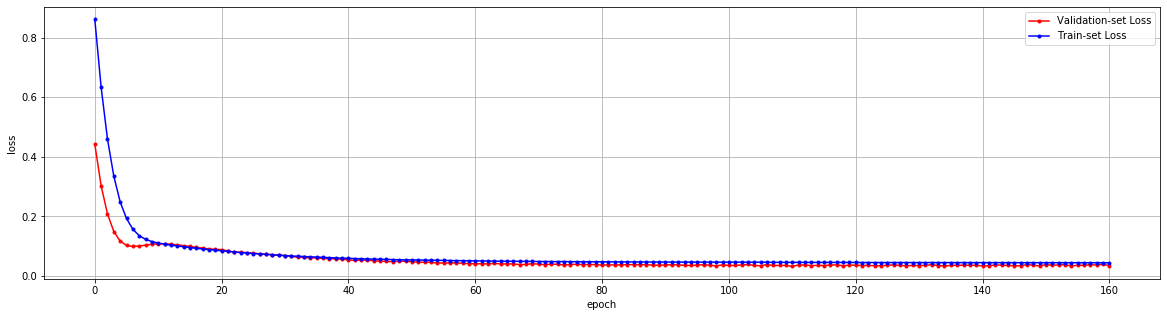

In [18]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.figure(figsize=(20,5))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [19]:
predicted = model.predict(test_input)
predicted=sc_df.inverse_transform(predicted)

In [20]:
predicted.shape

(125, 1)

In [21]:
actual = y[-125:].reset_index()['Close']

In [22]:
RMSE = mean_squared_error(actual, predicted)**0.5    
RMSE

4285.698226133122

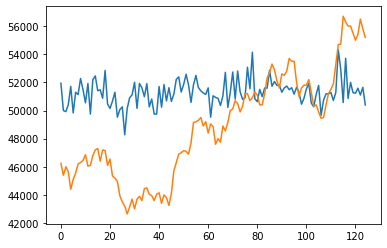

In [23]:
plt.plot(predicted)
plt.plot(actual)
plt.show()